In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.getcwd()

'/content'

In [0]:
os.chdir("gdrive")
os.chdir("My Drive")

In [0]:
os.chdir("tipr-third-assignment")
os.chdir("src")

In [6]:
os.listdir()

['__pycache__',
 '.ipynb_checkpoints',
 'main.py',
 'cnn.py',
 'cifar_cp.ckpt',
 'cifar.ckpt',
 'cifar_relu.ckpt',
 'cnn_cifar.py',
 'cifar_10_experimentation.ipynb',
 'Untitled.ipynb',
 'utils.py',
 'cifar_model.h5',
 'cifar_new.h5']

In [0]:
from utils import unpickle_cifar,get_batch_data_cifar
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.metrics import accuracy_score,f1_score


In [0]:
from cnn_cifar import CNN

In [0]:
images,label = get_batch_data_cifar(1)
for i in range(2,6): 
  i,lab = get_batch_data_cifar(i) 
  images = np.vstack((images,i)) 
  label.extend(lab)

images, x_test, label, y_test = train_test_split(images,label,test_size = 0.25)

In [11]:
images.shape

(37500, 32, 32, 3)

In [0]:
images,label = get_batch_data_cifar(1)
for i in range(2,6): 
  i,lab = get_batch_data_cifar(i) 
  images = np.vstack((images,i)) 
  label.extend(lab)
mean = np.mean(images,axis=(0,1,2,3))
std = np.std(images,axis=(0,1,2,3))

images, x_test, label, y_test = train_test_split(images,label,test_size = 0.10)

In [0]:
images = (images-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [17]:
print(np.where(images[0]<0))

(array([ 0,  0,  0, ..., 31, 31, 31]), array([ 0,  0,  0, ..., 31, 31, 31]), array([0, 1, 2, ..., 0, 1, 2]))


## # task 1, layer vs accuracy, 
kernel_size = 3   
32 filters at each layer  
layer =3,4,....8,  
15 epochs,   
25% test data

In [0]:
layers = [2,3,4,5,6,7,8]
acc = []
macro_f1 = []
micro_f1 = []

for l in layers :
  net = CNN(input_dim = (32,32,1),
          filter_size=[3] * l,
          output_dim = 10
         )
  net.fit(images,label,epoc=10)
  test_lab = net.predict(x_test)
  acc.append(accuracy_score(y_test,test_lab))
  macro_f1.append(f1_score(y_test,test_lab,average='macro'))
  micro_f1.append(f1_score(y_test,test_lab,average='micro'))
  print(l, acc, macro_f1, micro_f1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 30000 samples, validate on 7500 samples
Epoch 1/10
30000/30000 [==============================] - 8s 272us/sample - loss: 1.5635 - acc: 0.4484 - val_loss: 1.3240 - val_acc: 0.5508
Epoch 2/10
30000/30000 [==============================] - 7s 236us/sample - loss: 1.2619 - acc: 0.5630 - val_loss: 1.2477 - val_acc: 0.5653
Epoch 3/10
30000/30000 [==============================] - 7s 234us/sample - loss: 1.1455 - acc: 0.6030 - val_loss: 1.2286 - val_acc: 0.5768
Epoch 4/10
30000/30000 [==============================] - 7s 232us/sample - loss: 1.0814 - acc: 0.6269 - val_loss: 1.1411 - val_acc: 0.6097
Epoch 5/10
30000/30000 [==============================] - 7s 234us/sample - loss: 1.0260 - acc: 0.6466 - val_loss: 1.1620 - val_acc: 0.5997
Epoch 6/10
30000/30000 [==============================] - 7s 233

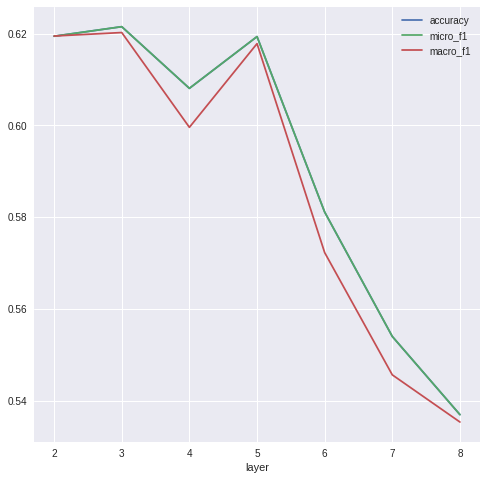

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel("layer")
plt.plot(layers,acc,label="accuracy")
plt.plot(layers,micro_f1,label = "micro_f1")
plt.plot(layers,macro_f1,label = "macro_f1")
plt.legend()
plt.show()

### task 2  
filter sizes (2,3,4,5,6)  
5 layers are fixed  
64 filters in each layer  

In [0]:
filter_sizes = [2,3,4,5,6]
acc = []
macro_f1 = []
micro_f1 = []

for f in filter_sizes :
  net = CNN(input_dim = (32,32,1),
          filter_size=[f] * 6,
          output_dim = 10
         )
  net.fit(images,label,epoc=10)
  test_lab = net.predict(x_test)
  acc.append(accuracy_score(y_test,test_lab))
  macro_f1.append(f1_score(y_test,test_lab,average='macro'))
  micro_f1.append(f1_score(y_test,test_lab,average='micro'))
  print(l, acc, macro_f1, micro_f1)

Train on 30000 samples, validate on 7500 samples
Epoch 1/10
30000/30000 [==============================] - 12s 390us/sample - loss: 1.9369 - acc: 0.2832 - val_loss: 1.6792 - val_acc: 0.3837
Epoch 2/10
30000/30000 [==============================] - 11s 365us/sample - loss: 1.6639 - acc: 0.3907 - val_loss: 1.5963 - val_acc: 0.4155
Epoch 3/10
30000/30000 [==============================] - 11s 366us/sample - loss: 1.5861 - acc: 0.4227 - val_loss: 1.5146 - val_acc: 0.4555
Epoch 4/10
30000/30000 [==============================] - 11s 366us/sample - loss: 1.5416 - acc: 0.4405 - val_loss: 1.4653 - val_acc: 0.4727
Epoch 5/10
30000/30000 [==============================] - 11s 365us/sample - loss: 1.4959 - acc: 0.4561 - val_loss: 1.4412 - val_acc: 0.4864
Epoch 6/10
30000/30000 [==============================] - 11s 362us/sample - loss: 1.4660 - acc: 0.4705 - val_loss: 1.4069 - val_acc: 0.4924
Epoch 7/10
30000/30000 [==============================] - 11s 364us/sample - loss: 1.4387 - acc: 0.4830 -

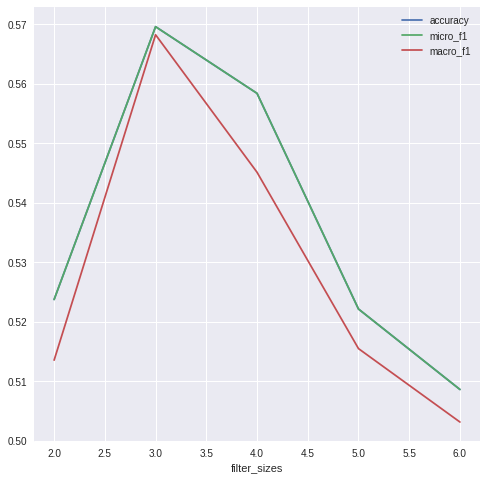

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.xlabel("filter_sizes")
plt.plot(filter_sizes,acc,label="accuracy")
plt.plot(filter_sizes,micro_f1,label = "micro_f1")
plt.plot(filter_sizes,macro_f1,label = "macro_f1")
plt.legend()
plt.show()

Task 3  
sigmoid,tanh,relu,swish  



In [0]:
filter_sizes = [3,3,3,3,3,3]
acc = []
macro_f1 = []
micro_f1 = []


net = CNN(input_dim = (32,32,1),
          filter_size=filter_sizes,
          output_dim = 10,
          activation=["sigmoid","tanh","relu","swish","swish","swish"]
         )
net.fit(images,label,epoc=20)
test_lab = net.predict(x_test)
acc.append(accuracy_score(y_test,test_lab))
macro_f1.append(f1_score(y_test,test_lab,average='macro'))
micro_f1.append(f1_score(y_test,test_lab,average='micro'))
print(l, acc, macro_f1, micro_f1)

Train on 30000 samples, validate on 7500 samples
Epoch 1/20
30000/30000 [==============================] - 14s 482us/sample - loss: 2.3037 - acc: 0.0976 - val_loss: 2.3029 - val_acc: 0.1039
Epoch 2/20
30000/30000 [==============================] - 14s 462us/sample - loss: 2.3031 - acc: 0.1035 - val_loss: 2.3028 - val_acc: 0.0989
Epoch 3/20
30000/30000 [==============================] - 14s 463us/sample - loss: 2.3031 - acc: 0.1003 - val_loss: 2.3028 - val_acc: 0.0991
Epoch 4/20
30000/30000 [==============================] - 14s 462us/sample - loss: 2.3032 - acc: 0.1012 - val_loss: 2.3026 - val_acc: 0.1023
Epoch 5/20
30000/30000 [==============================] - 14s 463us/sample - loss: 2.3032 - acc: 0.0979 - val_loss: 2.3030 - val_acc: 0.0989
Epoch 6/20
30000/30000 [==============================] - 14s 462us/sample - loss: 2.3031 - acc: 0.0998 - val_loss: 2.3026 - val_acc: 0.1003
Epoch 7/20
30000/30000 [==============================] - 14s 463us/sample - loss: 2.3032 - acc: 0.1004 -

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
filter_sizes = [3,3,3,3,3,3]
acc = []
macro_f1 = []
micro_f1 = []


net = CNN(input_dim = (32,32,1),
          filter_size=filter_sizes,
          output_dim = 10,
          filters = [64],
          activation=["swish"]
         )
net.fit(images,label,epoc=70,checkpoint_path = "cifar_swish.ckpt")
test_lab = net.predict(x_test)
acc.append(accuracy_score(y_test,test_lab))
macro_f1.append(f1_score(y_test,test_lab,average='macro'))
micro_f1.append(f1_score(y_test,test_lab,average='micro'))
print( acc, macro_f1, micro_f1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7eff3c7e3550>>
Train on 30000 samples, validate on 7500 samples
Epoch 1/70
29984/30000 [============================>.] - ETA: 0s - loss: 1.8458 - acc: 0.3168
Epoch 00001: val_loss improved from inf to 1.54924, saving model to cifar.ckpt
30000/30000 [==============================] - 55s 2ms/sample - loss: 1.8457 - acc: 0.3168 - val_loss: 1.5492 - val_acc: 0.4309
Epoch 2/70
29984/30000 [============================>.] - ETA: 0s - loss: 1.4786 - acc: 0.4604
Epoch 00002: val_loss improved from 1.54924 to 1.35133, saving model to cifar.ckpt
30000/30000 [==============================] - 35s 1ms/sample - loss: 1.4784 - acc: 0.4604 - val_loss: 1.3513 - val_acc: 0.5059
Epoch 3/70
29984/30000 [==================

In [0]:
filter_sizes = [3,3,3,3,3,3]
acc = []
macro_f1 = []
micro_f1 = []


net2 = CNN(input_dim = (32,32,1),
          filter_size=filter_sizes,
          output_dim = 10,
          filters = [64],
          activation=["relu"]
         )
net2.fit(images,label,epoc=70,checkpoint_path = "cifar_relu.ckpt")
test_lab = net.predict(x_test)
acc.append(accuracy_score(y_test,test_lab))
macro_f1.append(f1_score(y_test,test_lab,average='macro'))
micro_f1.append(f1_score(y_test,test_lab,average='micro'))
print( acc, macro_f1, micro_f1)

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7eff1ffb90f0>>
Train on 30000 samples, validate on 7500 samples
Epoch 1/70
29984/30000 [============================>.] - ETA: 0s - loss: 1.9193 - acc: 0.2906
Epoch 00001: val_loss improved from inf to 1.67750, saving model to cifar_relu.ckpt
30000/30000 [==============================] - 37s 1ms/sample - loss: 1.9192 - acc: 0.2908 - val_loss: 1.6775 - val_acc: 0.3721
Epoch 2/70
29952/30000 [============================>.] - ETA: 0s - loss: 1.5699 - acc: 0.4212
Epoch 00002: val_loss improved from 1.67750 to 1.51045, saving model to cifar_relu.ckpt
30000/30000 [==============================] - 48s 2ms/sample - loss: 1.5699 - acc: 0.4212 - val_loss: 1.5105 - val_acc: 0.4447
Epoch 3/70
29984/30000 [============================>.] - ETA: 0s - loss: 1.4000 - acc: 0.4896
Epoch 00003: val_loss improved from 1.51045 to 1.36766, saving model to cifar_relu.ckpt
30000/30000 [=======================

In [0]:
net.fit(images, label, epoc=5)
test_lab = net.predict(x_test)
acc.append(accuracy_score(y_test,test_lab))
macro_f1.append(f1_score(y_test,test_lab,average='macro'))
micro_f1.append(f1_score(y_test,test_lab,average='micro'))
print( acc, macro_f1, micro_f1)

Train on 30000 samples, validate on 7500 samples
Epoch 1/5
30000/30000 [==============================] - 29s 950us/sample - loss: 1.1033 - acc: 0.6029 - val_loss: 1.2910 - val_acc: 0.5512
Epoch 2/5
30000/30000 [==============================] - 28s 949us/sample - loss: 1.0400 - acc: 0.6244 - val_loss: 1.2038 - val_acc: 0.5752
Epoch 3/5
30000/30000 [==============================] - 29s 950us/sample - loss: 0.9812 - acc: 0.6487 - val_loss: 1.2538 - val_acc: 0.5728
Epoch 4/5
30000/30000 [==============================] - 28s 950us/sample - loss: 0.9239 - acc: 0.6690 - val_loss: 1.2327 - val_acc: 0.5865
Epoch 5/5
30000/30000 [==============================] - 28s 948us/sample - loss: 0.8669 - acc: 0.6877 - val_loss: 1.2656 - val_acc: 0.5756
[0.5388, 0.57696] [0.5293837379493238, 0.5702625840352935] [0.5388, 0.57696]


In [0]:
net.fit(images, label, epoc=10)
test_lab = net.predict(x_test)
acc.append(accuracy_score(y_test,test_lab))
macro_f1.append(f1_score(y_test,test_lab,average='macro'))
micro_f1.append(f1_score(y_test,test_lab,average='micro'))
print( acc, macro_f1, micro_f1)

Train on 30000 samples, validate on 7500 samples
Epoch 1/10
30000/30000 [==============================] - 28s 949us/sample - loss: 0.8036 - acc: 0.7114 - val_loss: 1.2097 - val_acc: 0.5911
Epoch 2/10
30000/30000 [==============================] - 28s 947us/sample - loss: 0.7505 - acc: 0.7310 - val_loss: 1.2077 - val_acc: 0.6023
Epoch 3/10
30000/30000 [==============================] - 28s 949us/sample - loss: 0.7076 - acc: 0.7447 - val_loss: 1.2925 - val_acc: 0.5991
Epoch 4/10
30000/30000 [==============================] - 28s 948us/sample - loss: 0.6546 - acc: 0.7649 - val_loss: 1.2744 - val_acc: 0.6017
Epoch 5/10
30000/30000 [==============================] - 28s 948us/sample - loss: 0.6060 - acc: 0.7814 - val_loss: 1.4421 - val_acc: 0.5904
Epoch 6/10
30000/30000 [==============================] - 29s 953us/sample - loss: 0.5735 - acc: 0.7932 - val_loss: 1.4582 - val_acc: 0.5908
Epoch 7/10
30000/30000 [==============================] - 29s 952us/sample - loss: 0.5243 - acc: 0.8091 -

In [0]:
net = CNN()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
embedding = net.get_embedding(x_test)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
embedding.shape

(12500, 64)

In [0]:
def tsne_transform_plot(data,label,n_components=2,fig_size=(10,10)):
    from sklearn import manifold
    from matplotlib import pyplot as plt
    %matplotlib inline
    perplexities = [2,10, 30, 50]
    for p in perplexities:
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=p)
        y = tsne.fit_transform(data)
        plt.figure(figsize=fig_size)
        plt.title("perplexity "+str(p))
        plt.scatter(y[:,0],y[:,1],c=label,cmap="plasma")
        plt.colorbar()
        plt.show()
        plt.close()

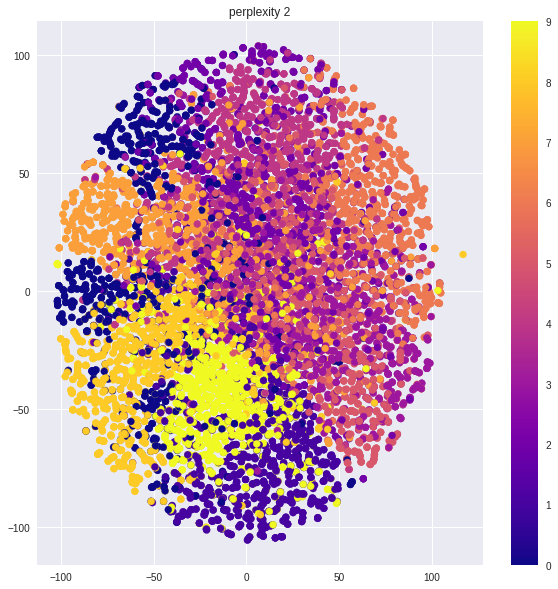

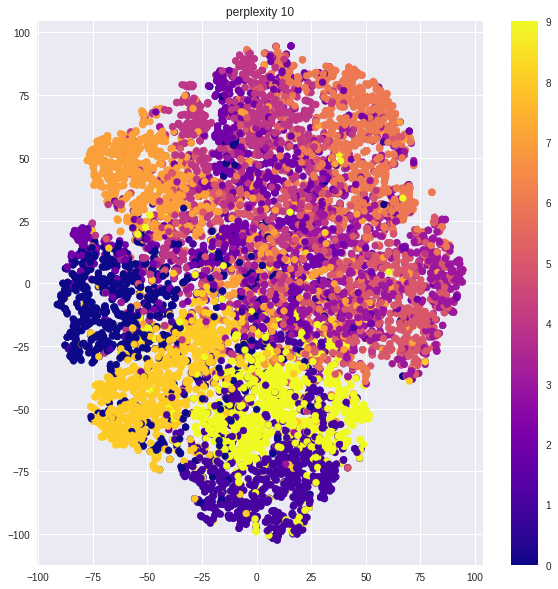

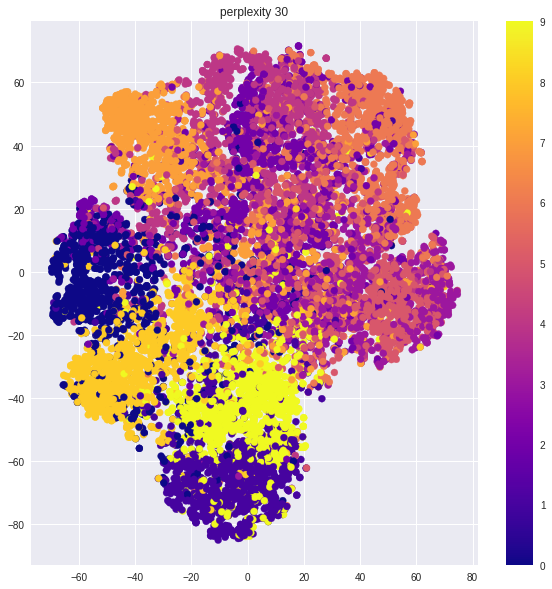

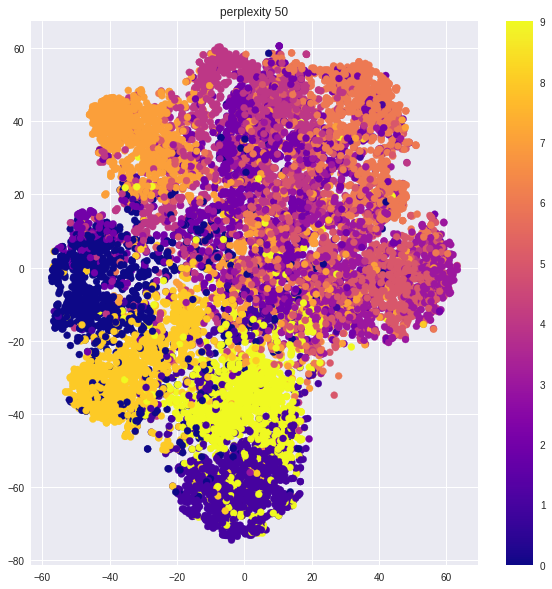

In [0]:
tsne_transform_plot(embedding,y_test)

In [0]:
net.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 64)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 64)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [0]:
import tensorflow as tf
new_model = tf.keras.Sequential()
        # i = 1
filter_size=[3,3,3,3,3,3]
new_model.add(tf.keras.layers.Conv2D(filters=64,
                                        kernel_size=(3,3),
                                        padding='same',
                                        activation='linear',
                                        input_shape=(32,32,1)))
for j in range(len(1,filter_size)):
  # self.model.add(tf.keras.layers.Conv2D(filters=filters[j],
  #                                  kernel_size=(filter_size[j],1),
  #                                  padding='same',
  #                                  activation=activation[j],
  #                                  input_shape=input_dim))
  new_model.add(tf.keras.layers.Conv2D(filters=64,
                                        kernel_size=(filter_size[j], filter_size[j]),
                                        padding='same',
                                        activation='linear',
                                       )
  new_model.add(tf.keras.layers.BatchNormalization(axis=1))
  new_model.add(tf.keras.layers.ReLU())
  if j%2 == 1:
      new_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#       self.model.add(tf.keras.layers.Dropout(dropout))
      # self.model.add(tf.keras.layers.BatchNormalization(axis = 1))

new_model.add(tf.keras.layers.Flatten())
new_model.add(tf.keras.layers.Dense(256,activation='relu'))
new_model.add(tf.keras.layers.Dense(128,activation='relu'))
new_model.add(tf.keras.layers.Dense(10,
                                activation='softmax'))

In [0]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_v1_19 (B (None, 32, 32, 64)        128       
_________________________________________________________________
re_lu_12 (ReLU)              (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_v1_20 (B (None, 32, 32, 64)        128       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [0]:
new_model.compile(loss='sparse_categorical_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

In [0]:
new_model.fit(images,label,epochs=10,validation_split=0.15)

Train on 31875 samples, validate on 5625 samples
Epoch 1/10
31875/31875 [==============================] - 47s 1ms/sample - loss: 1.8666 - acc: 0.3079 - val_loss: 1.6644 - val_acc: 0.3858
Epoch 2/10
31875/31875 [==============================] - 33s 1ms/sample - loss: 1.5881 - acc: 0.4173 - val_loss: 1.5303 - val_acc: 0.4386
Epoch 3/10
31875/31875 [==============================] - 32s 989us/sample - loss: 1.4389 - acc: 0.4786 - val_loss: 1.4970 - val_acc: 0.4626
Epoch 4/10
31875/31875 [==============================] - 34s 1ms/sample - loss: 1.3121 - acc: 0.5285 - val_loss: 1.4111 - val_acc: 0.5088
Epoch 5/10
31875/31875 [==============================] - 32s 990us/sample - loss: 1.2079 - acc: 0.5689 - val_loss: 1.2765 - val_acc: 0.5388
Epoch 6/10
31875/31875 [==============================] - 33s 1ms/sample - loss: 1.1238 - acc: 0.6004 - val_loss: 1.2104 - val_acc: 0.5762
Epoch 7/10
31875/31875 [==============================] - 32s 999us/sample - loss: 1.0592 - acc: 0.6237 - val_los

In [0]:
new_model.evaluate(x_test,y_test)

12500/12500 [==============================] - 3s 230us/sample - loss: 2.0684 - acc: 0.6102


[2.0683944525909426, 0.61016]

In [0]:
new_model.fit(images,label,epochs=7,validation_split=0.15)

Train on 31875 samples, validate on 5625 samples
Epoch 1/7
31875/31875 [==============================] - 45s 1ms/sample - loss: 0.8098 - acc: 0.7164 - val_loss: 1.0863 - val_acc: 0.6224
Epoch 2/7
31875/31875 [==============================] - 34s 1ms/sample - loss: 0.7476 - acc: 0.7374 - val_loss: 1.1413 - val_acc: 0.6203
Epoch 3/7
31875/31875 [==============================] - 32s 992us/sample - loss: 0.6885 - acc: 0.7555 - val_loss: 1.1786 - val_acc: 0.6123
Epoch 4/7
31875/31875 [==============================] - 35s 1ms/sample - loss: 0.6301 - acc: 0.7757 - val_loss: 1.2656 - val_acc: 0.6060
Epoch 5/7
31875/31875 [==============================] - 32s 988us/sample - loss: 0.5853 - acc: 0.7928 - val_loss: 1.1796 - val_acc: 0.6380
Epoch 6/7
31875/31875 [==============================] - 32s 993us/sample - loss: 0.5199 - acc: 0.8164 - val_loss: 1.2667 - val_acc: 0.6181
Epoch 7/7
31875/31875 [==============================] - 31s 988us/sample - loss: 0.4702 - acc: 0.8345 - val_loss: 1.

In [0]:
new_model.fit(images,label,epochs=10,validation_split=0.15)

Train on 31875 samples, validate on 5625 samples
Epoch 1/10
31875/31875 [==============================] - 32s 1ms/sample - loss: 0.4220 - acc: 0.8531 - val_loss: 1.3571 - val_acc: 0.6290
Epoch 2/10
31875/31875 [==============================] - 31s 988us/sample - loss: 0.3856 - acc: 0.8643 - val_loss: 1.4138 - val_acc: 0.6235
Epoch 3/10
31875/31875 [==============================] - 34s 1ms/sample - loss: 0.3394 - acc: 0.8810 - val_loss: 1.5403 - val_acc: 0.6142
Epoch 4/10
31875/31875 [==============================] - 31s 988us/sample - loss: 0.3079 - acc: 0.8900 - val_loss: 1.6113 - val_acc: 0.6140
Epoch 5/10
31875/31875 [==============================] - 35s 1ms/sample - loss: 0.2748 - acc: 0.9031 - val_loss: 1.6347 - val_acc: 0.6112
Epoch 6/10
31875/31875 [==============================] - 32s 991us/sample - loss: 0.2618 - acc: 0.9063 - val_loss: 1.6998 - val_acc: 0.6098
Epoch 7/10
31875/31875 [==============================] - 38s 1ms/sample - loss: 0.2199 - acc: 0.9234 - val_los